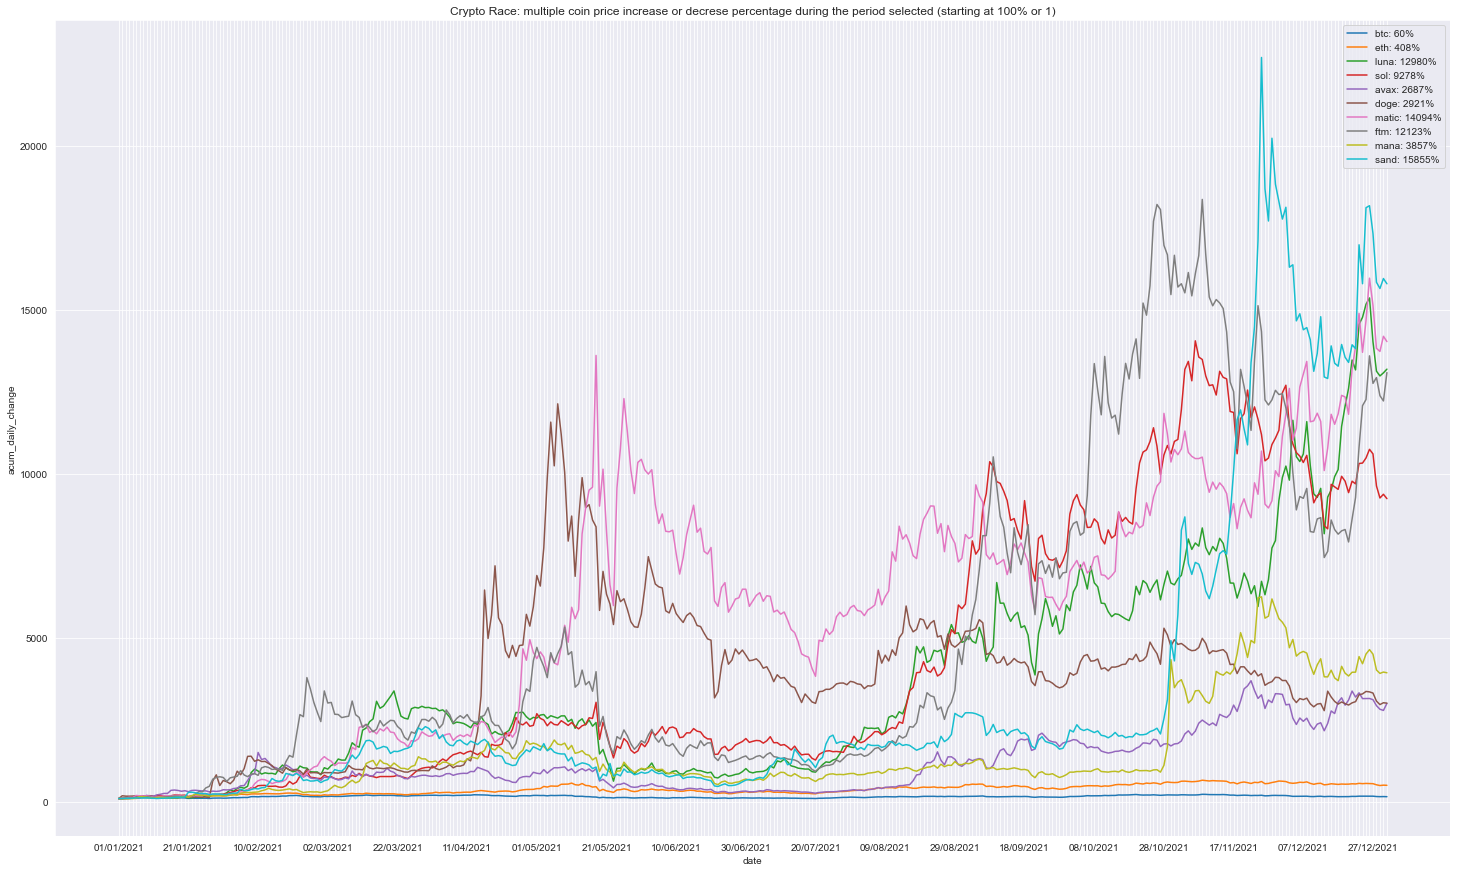

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.color_palette()

scope = pd.read_csv(r"/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/project_1/output/scope.csv")

#dictionary creation
tickers = scope["coin"].unique()
dict_tickers = {}

for key in tickers.tolist():
    dict_tickers[key] = key
    dict_tickers[key] = scope.loc[scope.coin == key]

stable_coins = ["usdt", "usdc", "dai", "busd", "ust"]
top_10 = ['btc', 'eth', 'luna', 'sol', 'avax', 'doge', 'matic', 'ftm', 'mana', 'sand'] #scope for this analysis

#plot by iteration
fig, axes = plt.subplots(1, 1, figsize=(25, 15), sharex=False, sharey=False)

for i in top_10:

    df = dict_tickers[i]
    df = df.loc[df["year"] == 2021]
    df = df.sort_values(["month", "date"]).reset_index()

    initial_price = df["close"].loc[df["date"] == "01/01/2021"].item()
    final_price = df["close"].loc[df["date"] == "30/12/2021"].item()
    increase_decrease = int(((final_price - initial_price) / initial_price) * 100)

    df['acum_daily_change'] = ((df["close"] - initial_price) / initial_price * 100) + 100
    df.loc[0, 'acum_daily_change'] = 100

    fig = sns.lineplot(data=df, x="date", y="acum_daily_change", label=f'{i}: {increase_decrease}%')
    axes.get_xaxis().set_visible(False)
axes.title.set_text('Crypto Race: multiple coin price increase or decrese percentage during the period selected (starting at 100% or 1)')
axes.get_xaxis().set_visible(True)
for ind, label in enumerate(fig.get_xticklabels()):
    if ind % 20 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)